In [159]:
import mysql.connector
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Establish connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ganesh@7272',
    database='steel_industry_db1',
    connect_timeout=30
)

# Define the query
query = "SELECT * FROM steel_production"

# Load data into a DataFrame
steel = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the DataFrame
print(steel)

    Grade of Steel                           Automotive application  \
0        AISI 1010                            Body panels, brackets   
1        AISI 1020                 Engine components, gears, shafts   
2        AISI 1030                         Springs, bolts, and nuts   
3        AISI 1040                  Transmission gears, crankshafts   
4        AISI 1050                       High-strength bolts, axles   
..             ...                                              ...   
307          10B21         Structural parts requiring high strength   
308          35B25                Safety components, reinforcements   
309          45B27        Ultra-high-strength structural components   
310          50B25  Ultra-high-strength steel for safety components   
311      AISI 1215                   Machined components, fasteners   

    Scrap Steel (%) DRI or Pig Iron (%) Iron Ore (%)  Phosphorus (%)  \
0            30.00               60.00        10.00             0.02   
1  

C:\Users\admin\AppData\Local\Temp\ipykernel_9104\3604917021.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  steel = pd.read_sql(query, connection)


In [93]:
steel.shape

(312, 27)

In [95]:
steel.describe()

,Phosphorus (%),Carbon (%),Total Electricity Consumption (kWh),New Iron Ore (%),New Electricity Consumption (kWh) Total
count,312.000000,312.000000,312.000000,312.000000,312.000000
mean,0.051218,0.780994,2076.298077,7.400641,1421.666667
std,0.063836,0.676614,649.324777,3.149501,492.684207
min,0.010000,0.080000,1000.000000,2.000000,400.000000
25%,0.020000,0.350000,1625.000000,5.000000,1000.000000
50%,0.030000,0.500000,2000.000000,5.000000,1350.000000
75%,0.050000,0.962500,2250.000000,10.000000,1720.000000
max,0.360000,3.500000,5125.000000,16.000000,3000.000000


In [97]:
steel.head(5)


,Grade of Steel,Automotive application,Scrap Steel (%),DRI or Pig Iron (%),Iron Ore (%),Phosphorus (%),Carbon (%),Melting Time (EAF),Production Volume,Yield,...,Total Electricity Consumption (kWh),Original Cost per Ton,New Scrap Steel (%),New DRI or Pig Iron (%),New Iron Ore (%),New Electricity Consumption (kWh) Total,BF Electricity (kWh) (New),EAF Electricity (kWh) (New),LRF Electricity (kWh) (New),Estimated Cost per Ton ($)
0,AISI 1010,"Body panels, brackets",30.00,60.00,10.00,0.02,0.08,1.5 hours,500 tons,95%,...,1000,$250,40,50,10,1100,440,400,260,$275
1,AISI 1020,"Engine components, gears, shafts",35.00,50.00,15.00,0.03,0.18,1.8 hours,600 tons,94%,...,1200,$260,40,45,15,1260,504,450,260,$280
2,AISI 1030,"Springs, bolts, and nuts",25.00,65.00,10.00,0.04,0.28,2.0 hours,700 tons,93%,...,1375,$270,30,60,10,1320,528,528,270,$275
3,AISI 1040,"Transmission gears, crankshafts",20.00,70.00,10.00,0.05,0.35,2.2 hours,800 tons,92%,...,1500,$280,25,65,10,1475,590,590,280,$280
4,AISI 1050,"High-strength bolts, axles",15.00,75.00,10.00,0.06,0.45,2.5 hours,900 tons,91%,...,1625,$290,25,65,10,1475,590,590,295,$280


In [99]:
steel.dtypes

Grade of Steel                              object
Automotive application                      object
Scrap Steel (%)                             object
DRI or Pig Iron (%)                         object
Iron Ore (%)                                object
Phosphorus (%)                             float64
Carbon (%)                                 float64
Melting Time (EAF)                          object
Production Volume                           object
Yield                                       object
BF Stage Cycle Time                         object
EAF Stage Cycle Time                        object
LRF Stage Cycle Time                        object
Total Cycle Time                            object
BF Electricity (kWh)                        object
EAF Electricity (kWh)                       object
LRF Electricity (kWh)                       object
Total Electricity Consumption (kWh)          int64
Original Cost per Ton                       object
New Scrap Steel (%)            

In [79]:
steel.columns


Index(['Grade of Steel', 'Automotive application', 'Scrap Steel (%)',
       'DRI or Pig Iron (%)', 'Iron Ore (%)', 'Phosphorus (%)', 'Carbon (%)',
       'Melting Time (EAF)', 'Production Volume', 'Yield',
       'BF Stage Cycle Time', 'EAF Stage Cycle Time', 'LRF Stage Cycle Time',
       'Total Cycle Time', 'BF Electricity (kWh)', 'EAF Electricity (kWh)',
       'LRF Electricity (kWh)', 'Total Electricity Consumption (kWh)',
       'Original Cost per Ton', 'New Scrap Steel (%)',
       'New DRI or Pig Iron (%)', 'New Iron Ore (%)',
       'New Electricity Consumption (kWh) Total', 'BF Electricity (kWh) (New)',
       'EAF Electricity (kWh) (New)', 'LRF Electricity (kWh) (New)',
       'Estimated Cost per Ton ($)'],
      dtype='object')

In [105]:
#EDA -------------------------
# FIRST BUSSINESS MOMENTS
# MEAN , MEDIAN ,MODE
import pandas as pd
import re

# Load your data into a DataFrame (replace with your actual data file path)
# steel = pd.read_csv('your_file.csv')

# Function to extract numeric values from strings
def convert_to_float(value):
    if pd.isna(value):
        return None
    numeric_value = re.findall(r'\d+\.?\d*', str(value))
    return float(numeric_value[0]) if numeric_value else None

# List of columns to clean
columns_to_clean = [
    'Scrap Steel (%)', 'DRI or Pig Iron (%)', 'Iron Ore (%)',
    'Phosphorus (%)', 'Carbon (%)', 'Melting Time (EAF)',
    'Production Volume', 'Yield', 'BF Stage Cycle Time',
    'EAF Stage Cycle Time', 'LRF Stage Cycle Time', 'Total Cycle Time',
    'BF Electricity (kWh)', 'EAF Electricity (kWh)', 'LRF Electricity (kWh)',
    'Total Electricity Consumption (kWh)', 'Original Cost per Ton',
    'New Scrap Steel (%)', 'New DRI or Pig Iron (%)', 'New Iron Ore (%)',
    'New Electricity Consumption (kWh) Total', 'BF Electricity (kWh) (New)',
    'EAF Electricity (kWh) (New)', 'LRF Electricity (kWh) (New)',
    'Estimated Cost per Ton ($)'
]

# Apply conversion to the specified columns
for column in columns_to_clean:
    steel[column] = steel[column].apply(convert_to_float)

# Calculate statistics
mean_values = steel.mean(numeric_only=True)

median_values = steel.median(numeric_only=True)
mode_values = steel.mode(numeric_only=True)



# Print the values
print("Mean values for each column:")
print(mean_values)

print("\nMedian values for each column:")
print(median_values)

print("\nMode values for each column:")
print(mode_values)


Mean values for each column:
Scrap Steel (%)                              54.173077
DRI or Pig Iron (%)                          39.121795
Iron Ore (%)                                  6.750000
Phosphorus (%)                                0.051218
Carbon (%)                                    0.780994
Melting Time (EAF)                            2.991346
Production Volume                           975.160256
Yield                                        67.574359
BF Stage Cycle Time                           2.654487
EAF Stage Cycle Time                          2.654487
LRF Stage Cycle Time                          1.336859
Total Cycle Time                              6.654808
BF Electricity (kWh)                        830.519231
EAF Electricity (kWh)                       830.519231
LRF Electricity (kWh)                       415.259615
Total Electricity Consumption (kWh)        2076.298077
Original Cost per Ton                       362.147436
New Scrap Steel (%)                 

In [107]:
# Second bussiness moments
# STANDARD DEVIATION , VARIANCE , RANGE

stddev_values = steel.std(numeric_only=True)
variance_values = steel.var(numeric_only=True)
range_values = steel.max(numeric_only=True) - steel.min(numeric_only=True)

# Print the values
print("Standard Deviation for each column:")
print(stddev_values)

print("\nVariance for each column:")
print(variance_values)

print("\nRange for each column:")
print(range_values)

Standard Deviation for each column:
Scrap Steel (%)                             27.288659
DRI or Pig Iron (%)                         25.268549
Iron Ore (%)                                 3.108178
Phosphorus (%)                               0.063836
Carbon (%)                                   0.676614
Melting Time (EAF)                           1.289391
Production Volume                          562.182220
Yield                                       33.641113
BF Stage Cycle Time                          1.330805
EAF Stage Cycle Time                         1.330805
LRF Stage Cycle Time                         0.669348
Total Cycle Time                             3.328066
BF Electricity (kWh)                       259.729911
EAF Electricity (kWh)                      259.729911
LRF Electricity (kWh)                      129.864955
Total Electricity Consumption (kWh)        649.324777
Original Cost per Ton                       77.144813
New Scrap Steel (%)                         25

In [111]:
# THIRD BUSSINESS MOMENTS
#SKEWNESS
skewness_values = steel.skew(numeric_only=True)
print("\nSkewness for each column:")
print(skewness_values)


Skewness for each column:
Scrap Steel (%)                           -0.670945
DRI or Pig Iron (%)                        0.741186
Iron Ore (%)                               1.312932
Phosphorus (%)                             2.956101
Carbon (%)                                 1.827102
Melting Time (EAF)                         2.884818
Production Volume                          2.720568
Yield                                     -1.334210
BF Stage Cycle Time                        2.759401
EAF Stage Cycle Time                       2.759401
LRF Stage Cycle Time                       2.707431
Total Cycle Time                           2.748672
BF Electricity (kWh)                       1.953084
EAF Electricity (kWh)                      1.953084
LRF Electricity (kWh)                      1.953084
Total Electricity Consumption (kWh)        1.953084
Original Cost per Ton                      0.524923
New Scrap Steel (%)                       -0.637406
New DRI or Pig Iron (%)              

In [117]:
# FOURTH BUSSINESS MOMENTS
#KURTOSIS
kurtosis_values = steel.kurt(numeric_only=True)
print("\nKurtosis for each column:")
print(kurtosis_values)


Kurtosis for each column:
Scrap Steel (%)                           -1.163463
DRI or Pig Iron (%)                       -0.910079
Iron Ore (%)                               0.643693
Phosphorus (%)                             9.033281
Carbon (%)                                 3.087879
Melting Time (EAF)                         9.319431
Production Volume                          7.972647
Yield                                      0.024710
BF Stage Cycle Time                        8.607046
EAF Stage Cycle Time                       8.607046
LRF Stage Cycle Time                       8.358012
Total Cycle Time                           8.565579
BF Electricity (kWh)                       5.972617
EAF Electricity (kWh)                      5.972617
LRF Electricity (kWh)                      5.972617
Total Electricity Consumption (kWh)        5.972617
Original Cost per Ton                     -0.969567
New Scrap Steel (%)                       -1.142408
New DRI or Pig Iron (%)              

#DATA PREPROCCESSING

In [ ]:
#typecasting

In [119]:
steel.dtypes


Grade of Steel                              object
Automotive application                      object
Scrap Steel (%)                            float64
DRI or Pig Iron (%)                        float64
Iron Ore (%)                               float64
Phosphorus (%)                             float64
Carbon (%)                                 float64
Melting Time (EAF)                         float64
Production Volume                          float64
Yield                                      float64
BF Stage Cycle Time                        float64
EAF Stage Cycle Time                       float64
LRF Stage Cycle Time                       float64
Total Cycle Time                           float64
BF Electricity (kWh)                       float64
EAF Electricity (kWh)                      float64
LRF Electricity (kWh)                      float64
Total Electricity Consumption (kWh)        float64
Original Cost per Ton                      float64
New Scrap Steel (%)            

In [ ]:
#GRAPHICAL REPRESENTATION

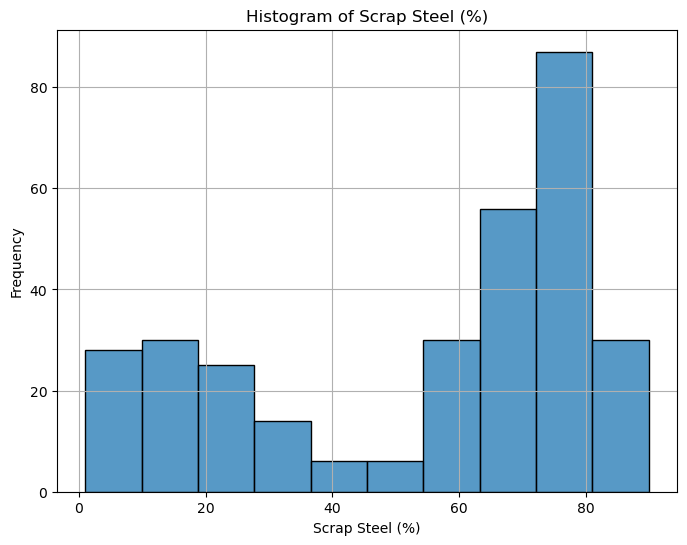

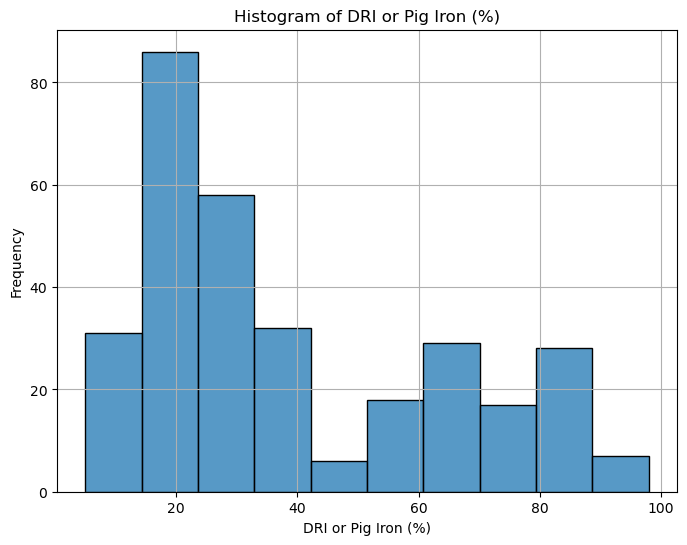

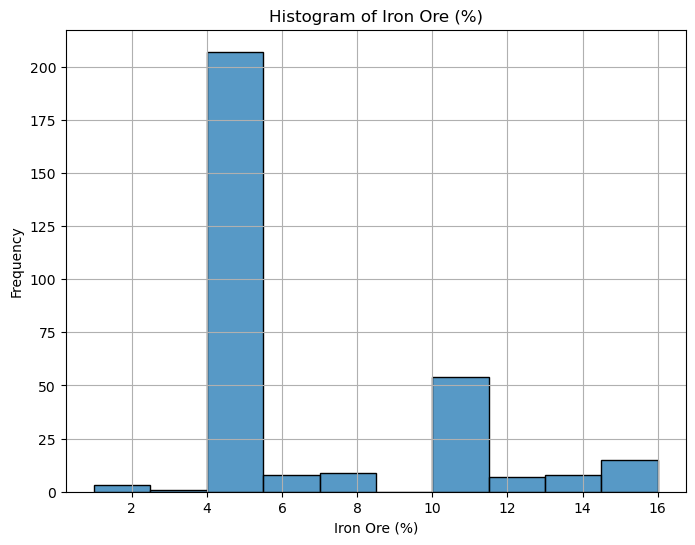

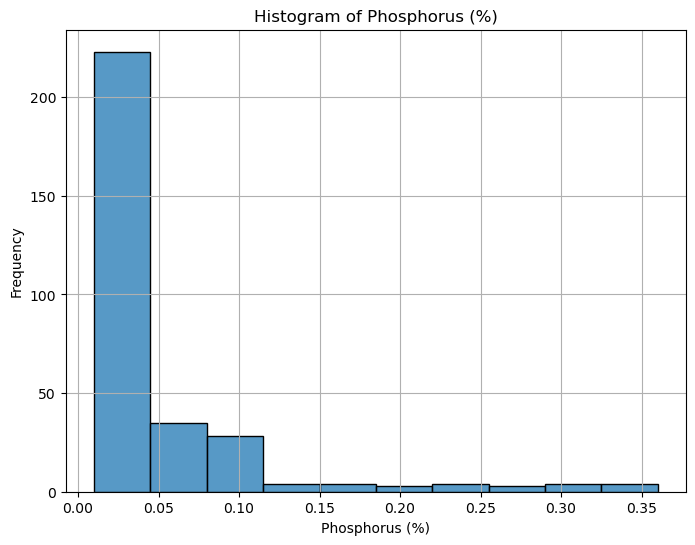

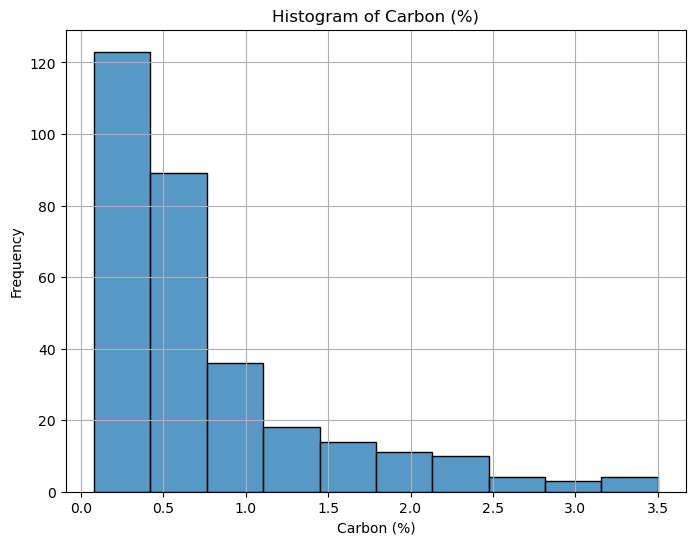

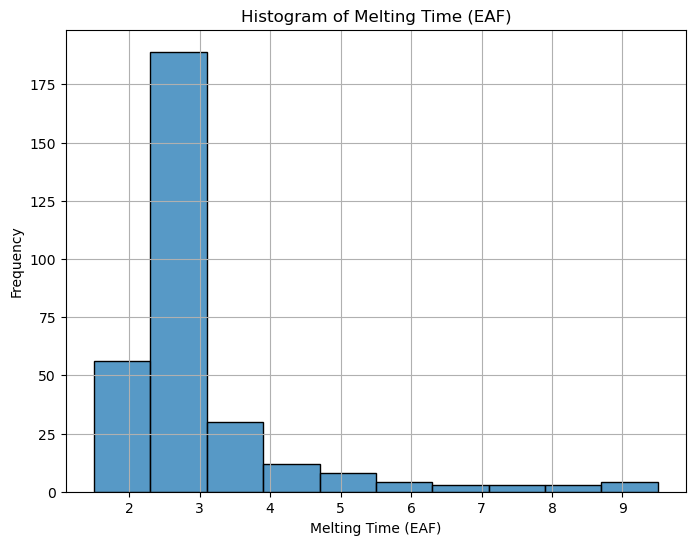

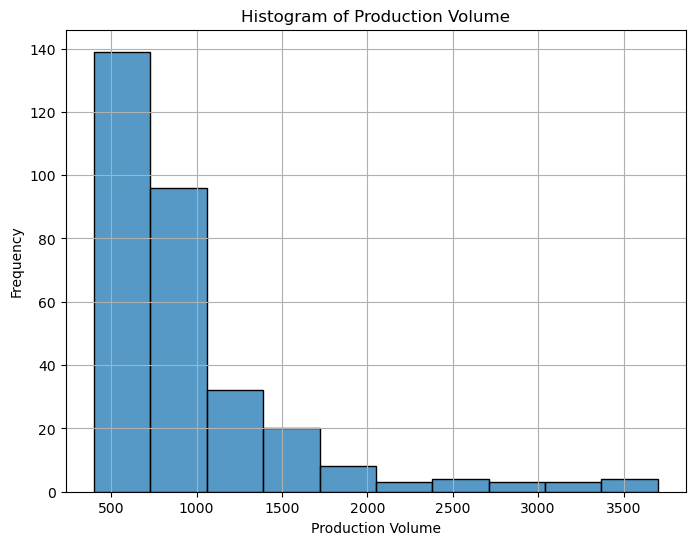

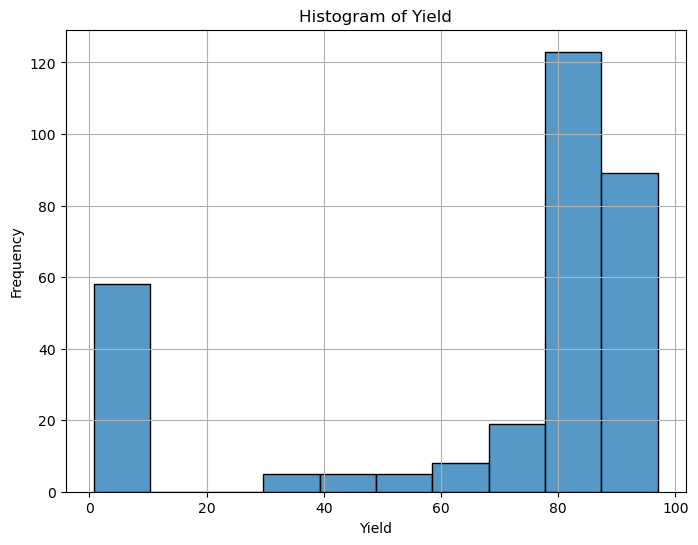

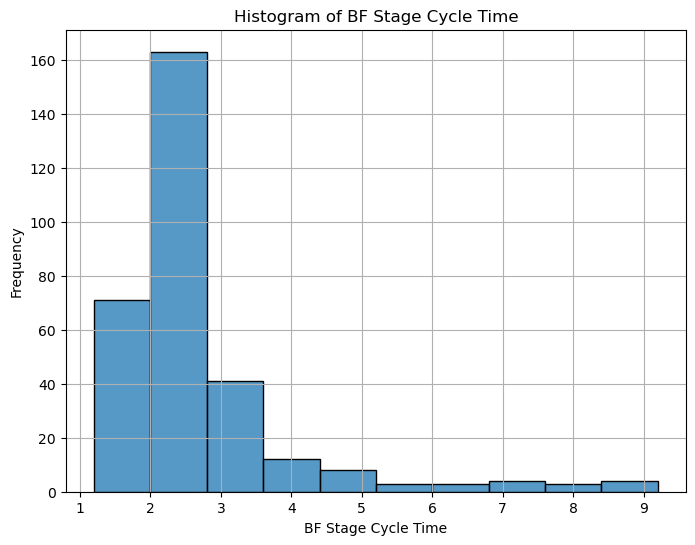

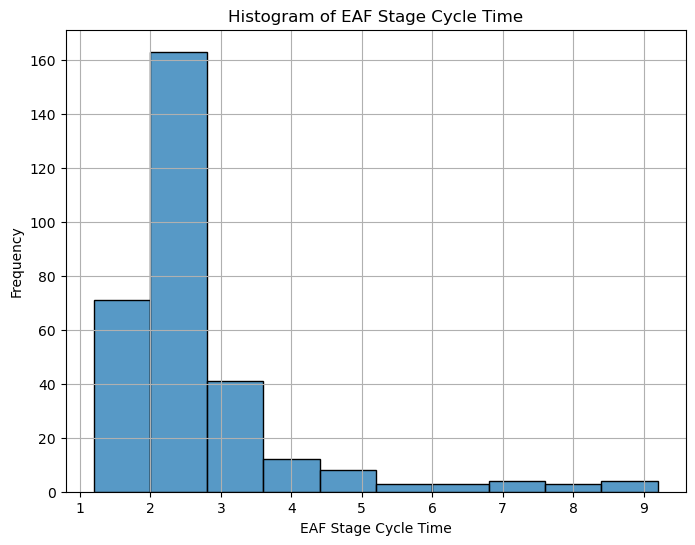

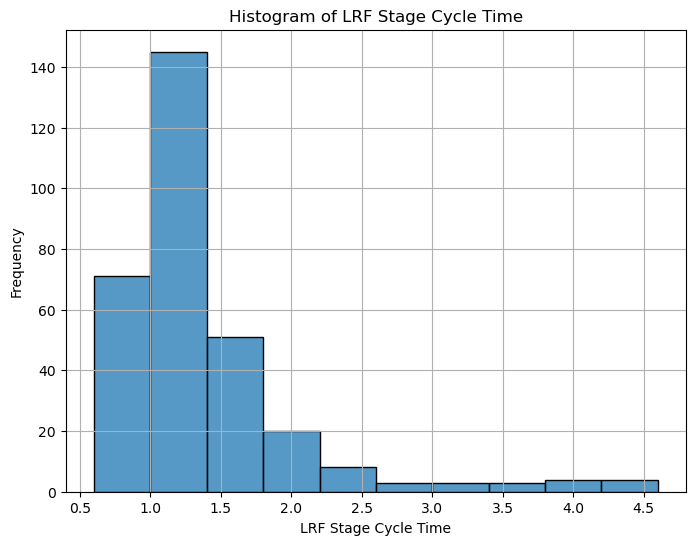

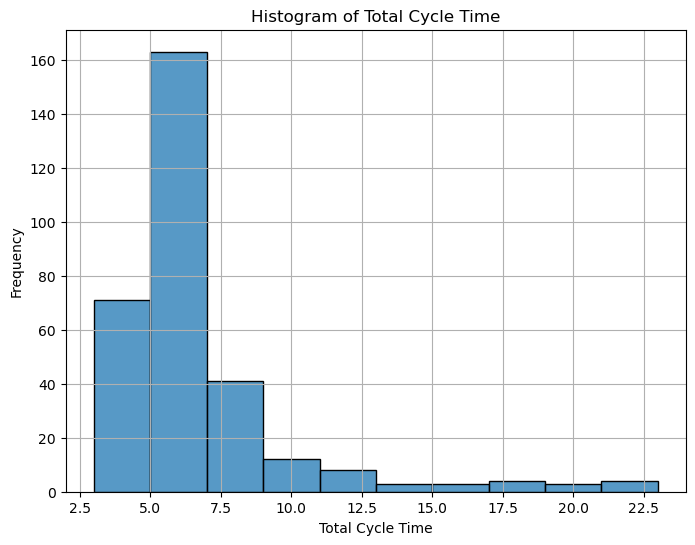

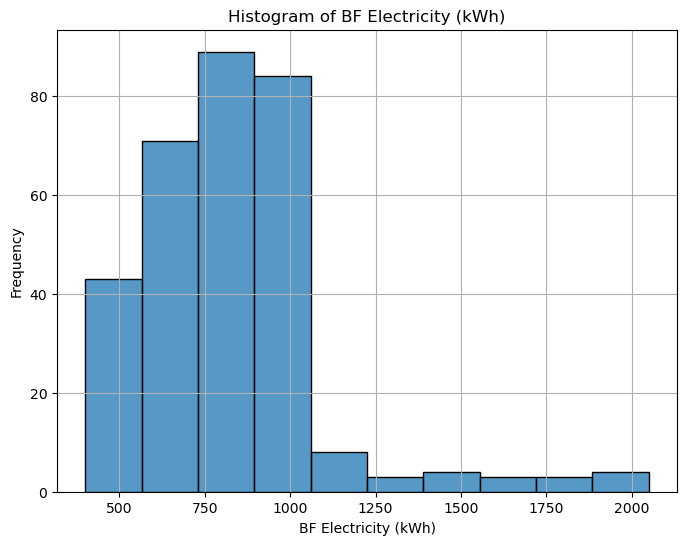

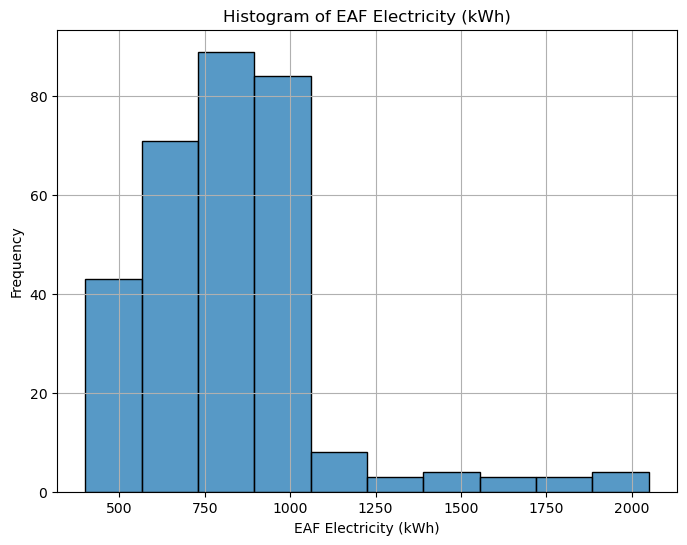

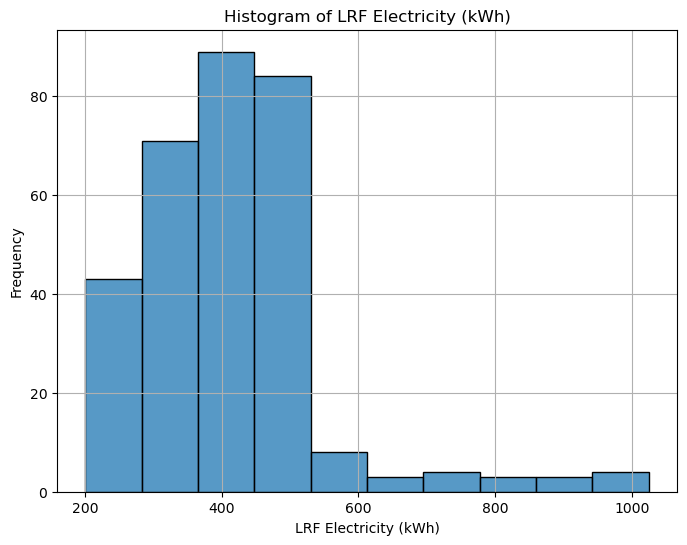

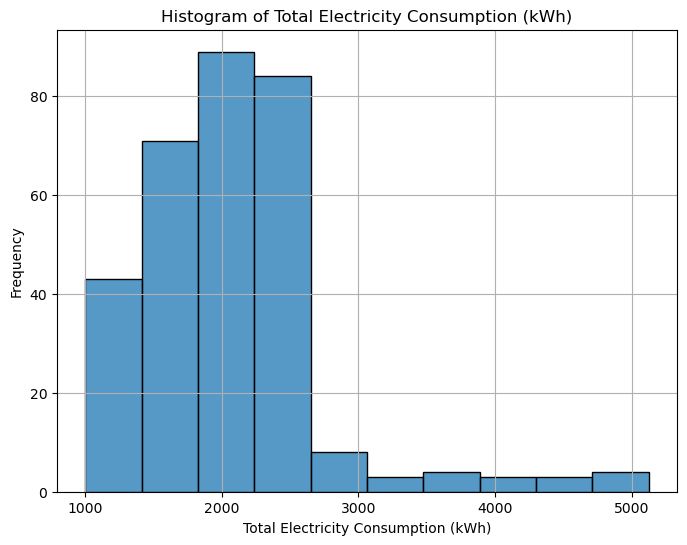

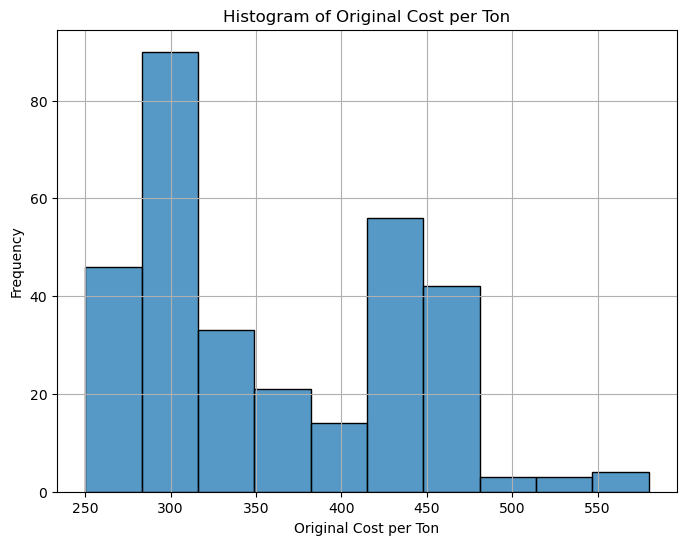

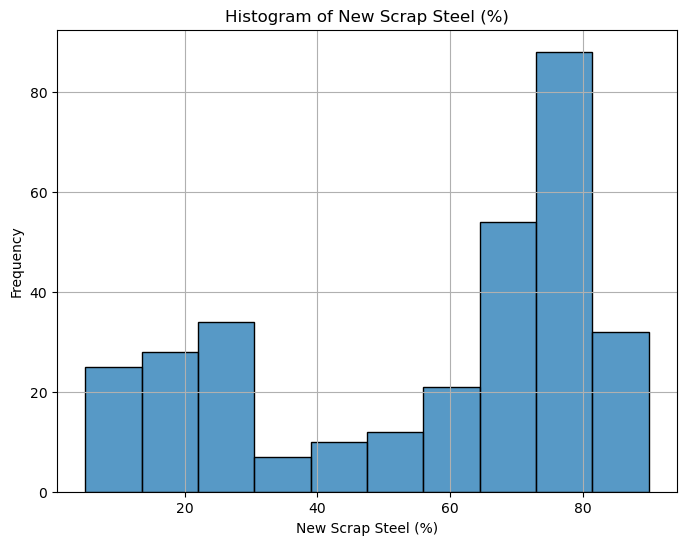

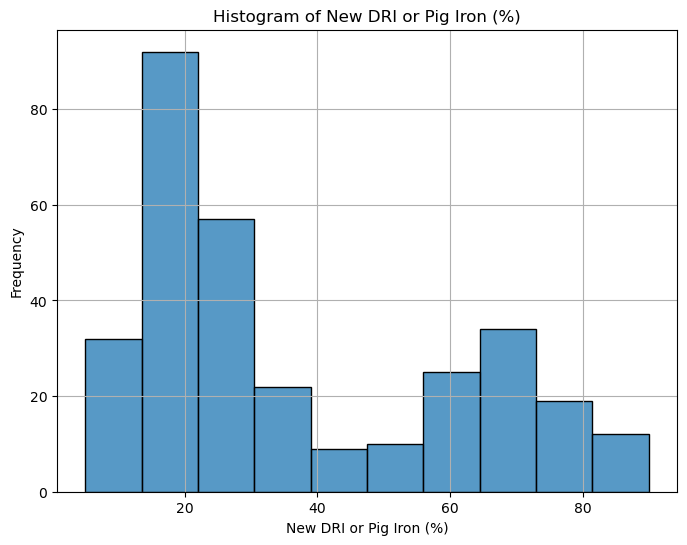

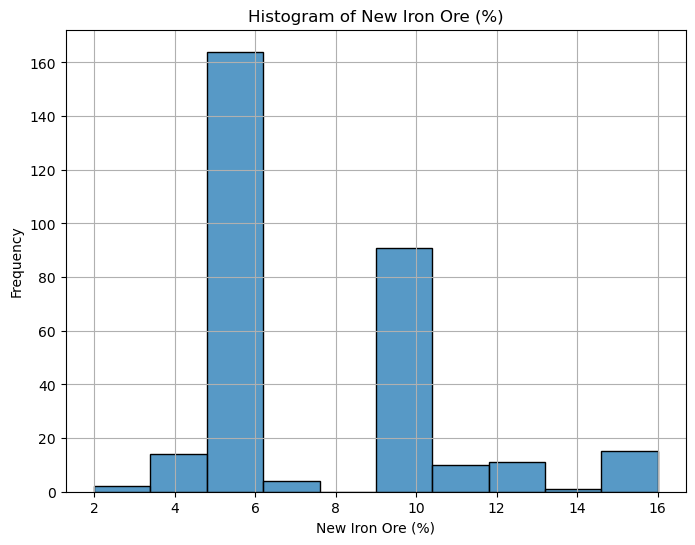

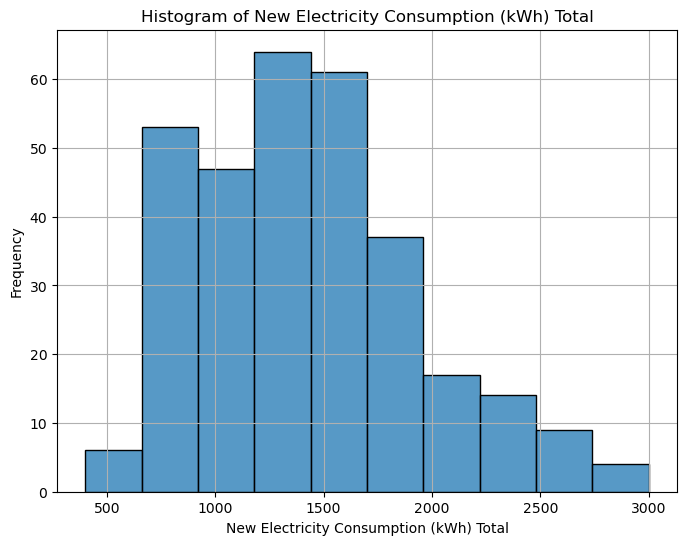

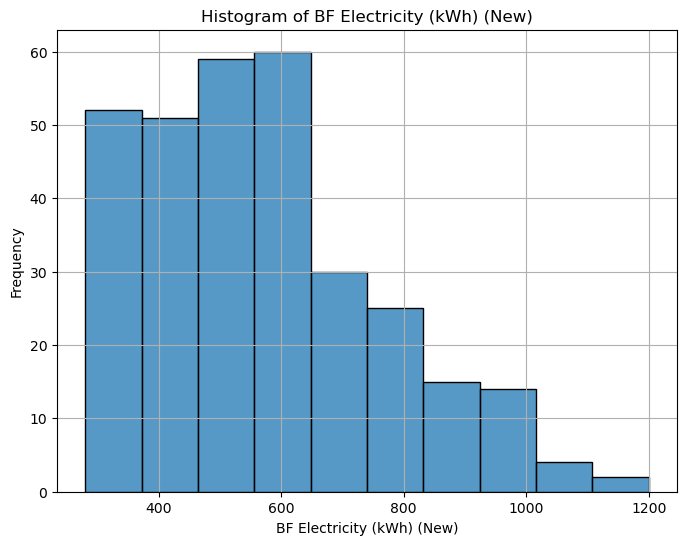

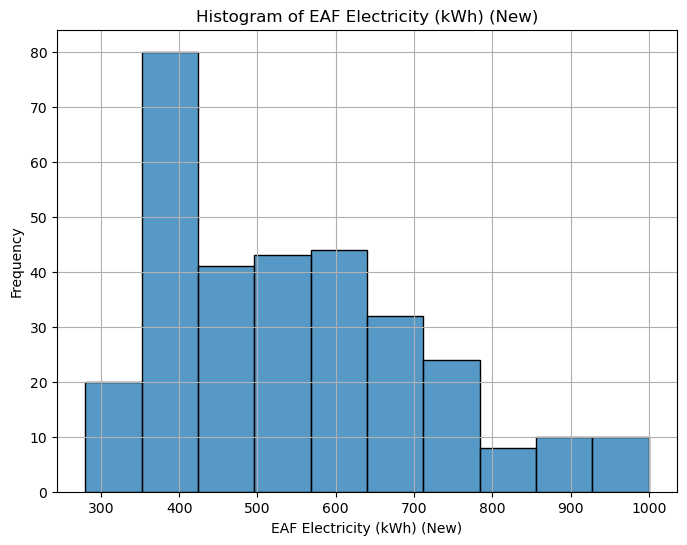

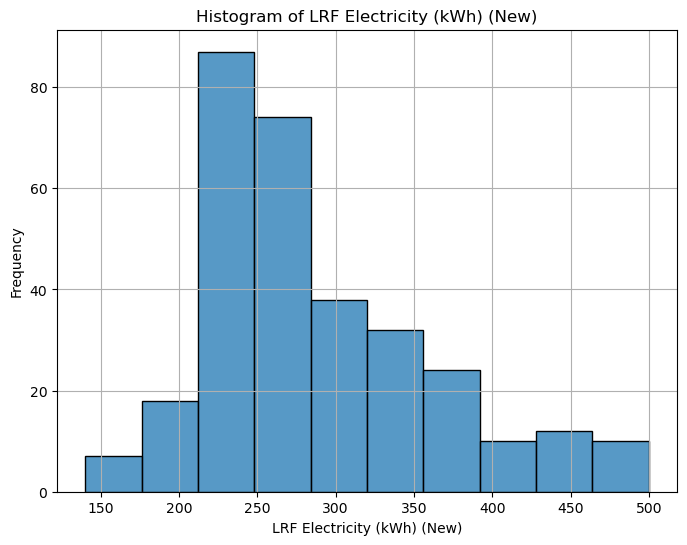

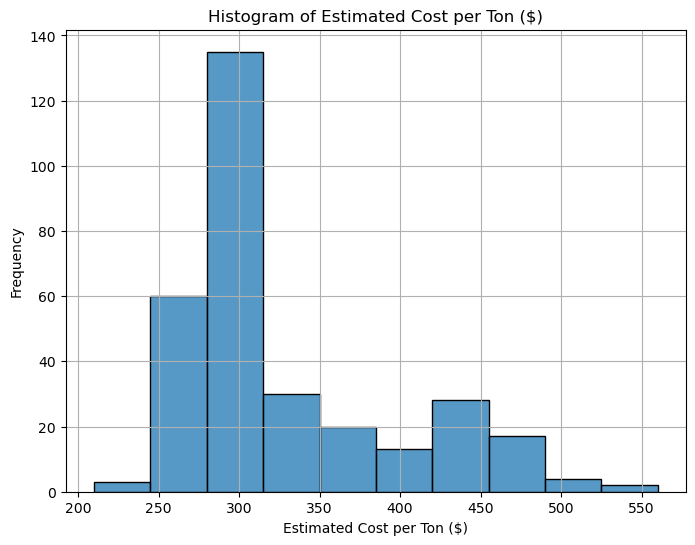

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# Replace 'steel' with the name of your DataFrame


# Plotting histograms for all numeric columns in separate figures
numeric_columns = steel.select_dtypes(include=['int','float']).columns  # Select numeric columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column
    sns.histplot(steel[column], kde=False, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [186]:
#REMOVE DUPLICATE


In [125]:
duplicate= steel.duplicated
print(duplicate)

<bound method DataFrame.duplicated of     Grade of Steel                           Automotive application  \
0        AISI 1010                            Body panels, brackets   
1        AISI 1020                 Engine components, gears, shafts   
2        AISI 1030                         Springs, bolts, and nuts   
3        AISI 1040                  Transmission gears, crankshafts   
4        AISI 1050                       High-strength bolts, axles   
..             ...                                              ...   
307          10B21         Structural parts requiring high strength   
308          35B25                Safety components, reinforcements   
309          45B27        Ultra-high-strength structural components   
310          50B25  Ultra-high-strength steel for safety components   
311      AISI 1215                   Machined components, fasteners   

     Scrap Steel (%)  DRI or Pig Iron (%)  Iron Ore (%)  Phosphorus (%)  \
0               30.0              

In [145]:
import pandas as pd

# Assuming steel is already defined as your DataFrame
# steel = pd.read_csv('your_file_path.csv')  # Uncomment to load your data

# Remove duplicates while keeping the first occurrence
steel_cleaned = steel.drop_duplicates(keep='first')

# Print the cleaned DataFrame
print(steel_cleaned)


    Grade of Steel                           Automotive application  \
0        AISI 1010                            Body panels, brackets   
1        AISI 1020                 Engine components, gears, shafts   
2        AISI 1030                         Springs, bolts, and nuts   
3        AISI 1040                  Transmission gears, crankshafts   
4        AISI 1050                       High-strength bolts, axles   
..             ...                                              ...   
307          10B21         Structural parts requiring high strength   
308          35B25                Safety components, reinforcements   
309          45B27        Ultra-high-strength structural components   
310          50B25  Ultra-high-strength steel for safety components   
311      AISI 1215                   Machined components, fasteners   

    Scrap Steel (%) DRI or Pig Iron (%) Iron Ore (%)  Phosphorus (%)  \
0            30.00               60.00        10.00             0.02   
1  

In [58]:
#MISSING VALUES

In [161]:
import pandas as pd



# Check for missing values (NaNs) in the dataset
print(steel.isna().sum())




Grade of Steel                             0
Automotive application                     0
Scrap Steel (%)                            0
DRI or Pig Iron (%)                        0
Iron Ore (%)                               0
Phosphorus (%)                             0
Carbon (%)                                 0
Melting Time (EAF)                         0
Production Volume                          0
Yield                                      0
BF Stage Cycle Time                        0
EAF Stage Cycle Time                       0
LRF Stage Cycle Time                       0
Total Cycle Time                           0
BF Electricity (kWh)                       0
EAF Electricity (kWh)                      0
LRF Electricity (kWh)                      0
Total Electricity Consumption (kWh)        0
Original Cost per Ton                      0
New Scrap Steel (%)                        0
New DRI or Pig Iron (%)                    0
New Iron Ore (%)                           0
New Electr

In [163]:
import pandas as pd
import numpy as np



# Create DataFrame
df=pd.DataFrame(steel)

# Replace missing values with the median of each column
df.fillna(df.mode(), inplace=True)

print("DataFrame after replacing missing values with median:")
print(df)


DataFrame after replacing missing values with median:
    Grade of Steel                           Automotive application  \
0        AISI 1010                            Body panels, brackets   
1        AISI 1020                 Engine components, gears, shafts   
2        AISI 1030                         Springs, bolts, and nuts   
3        AISI 1040                  Transmission gears, crankshafts   
4        AISI 1050                       High-strength bolts, axles   
..             ...                                              ...   
307          10B21         Structural parts requiring high strength   
308          35B25                Safety components, reinforcements   
309          45B27        Ultra-high-strength structural components   
310          50B25  Ultra-high-strength steel for safety components   
311      AISI 1215                   Machined components, fasteners   

    Scrap Steel (%) DRI or Pig Iron (%) Iron Ore (%)  Phosphorus (%)  \
0            30.00   

In [ ]:
#OUTLIERS

In [165]:
import pandas as pd


# Now you can proceed with selecting numeric columns and identifying outliers
numeric_columns = steel.select_dtypes(include=['int', 'float']).columns

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identifying outliers for each numeric column
outlier_dict = {}
for column in numeric_columns:
    outliers = identify_outliers(steel, column)
    outlier_dict[column] = outliers

# Print outliers for each numeric column
for column, outliers in outlier_dict.items():
    print(f'Outliers in {column}:\n{outliers}\n')


Outliers in Phosphorus (%):
    Grade of Steel                            Automotive application  \
8        AISI 1090                           Gears, heavy-duty axles   
33        SAE 6150       High-strength springs, wear-resistant parts   
42          S550MC  Structural reinforcements, crash-resistant parts   
51         HC550LA      Safety components, structural reinforcements   
65        TRIP1000     Crash-resistant structures, safety components   
72       QStE600TM          High-strength steel for crash structures   
73       QStE650TM          Structural parts requiring high strength   
74       QStE700TM                 Safety components, reinforcements   
80         16MnCr5             Gears, shafts, high-stress components   
81         20MnCr5                      Structural components, gears   
82     18CrNiMo7-6             High-strength gears, heavy-duty axles   
83         20CrMo5               Structural components, gears, axles   
84         30CrMo5                  

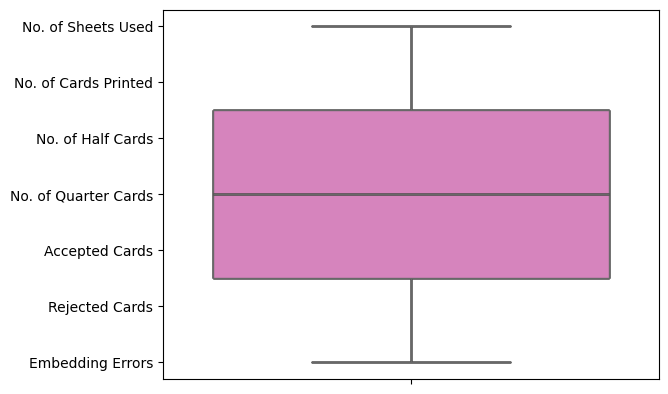

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# Replace 'steel' with the name of your DataFrame


# Plotting histograms for all numeric columns in separate figures
numeric_columns = steel.select_dtypes(include=['int','float']).columns  # Select numeric columns

for column in numeric_columns:
    sns.boxplot(numeric_columns)


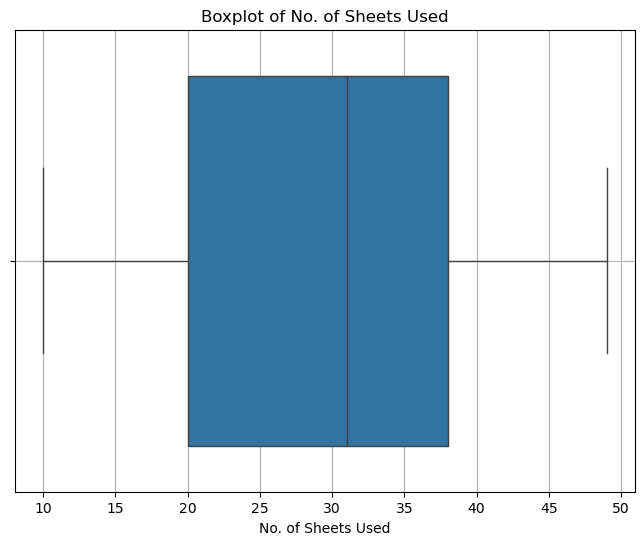

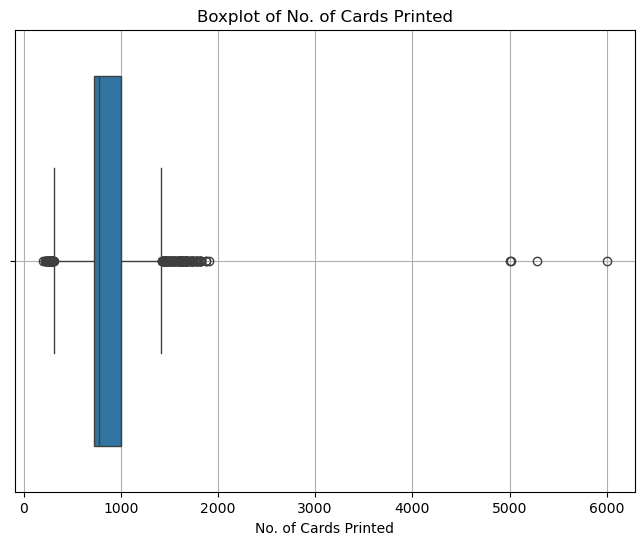

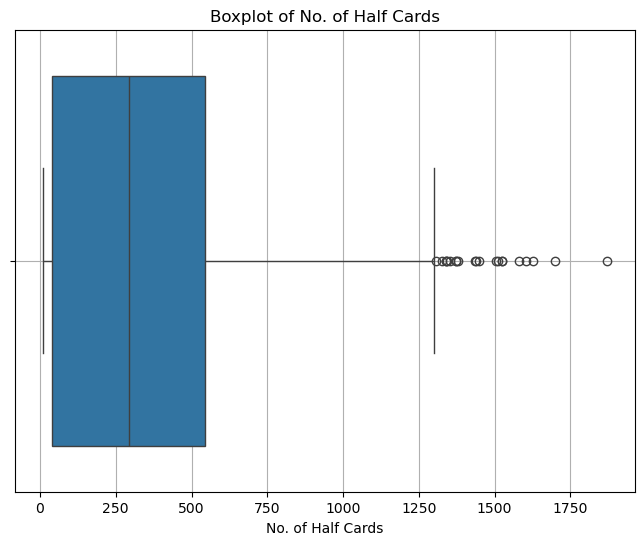

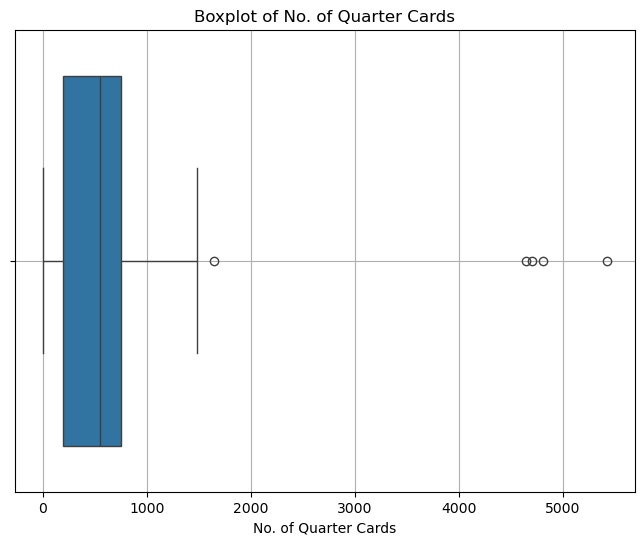

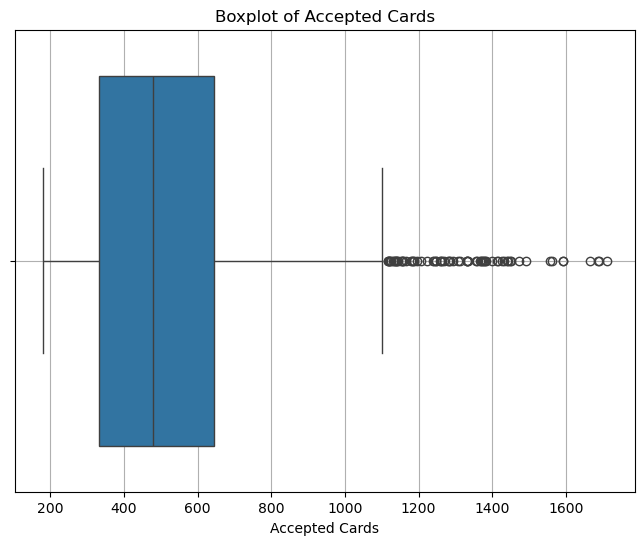

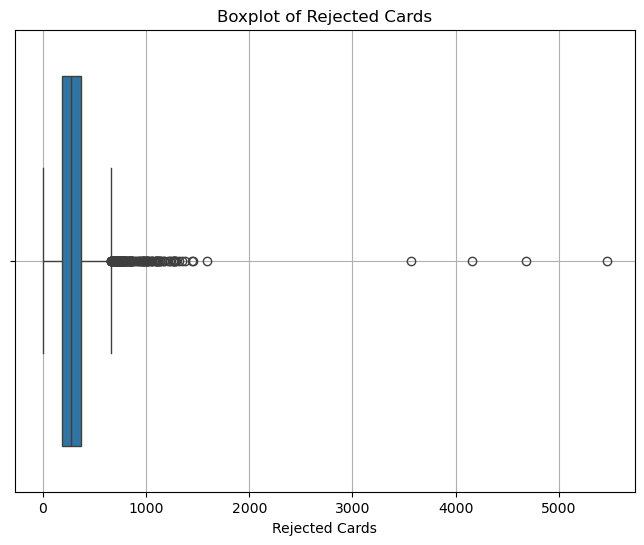

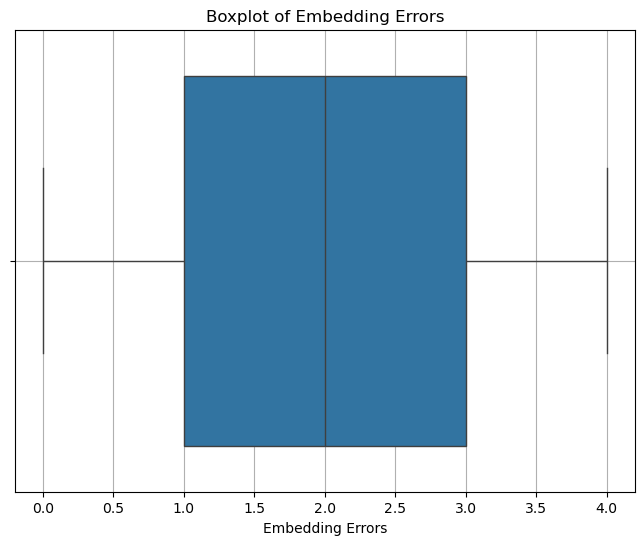

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace 'steel' with your actual DataFrame)
# Replace 'steel' with the name of your DataFrame
# steel = pd.DataFrame(...)

# Plotting boxplots for all numeric columns in separate figures
numeric_columns = steel.select_dtypes(include=['int', 'float']).columns  # Select numeric columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column
    sns.boxplot(x=steel[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()


Outliers in Phosphorus (%):
    Grade of Steel                            Automotive application  \
8        AISI 1090                           Gears, heavy-duty axles   
33        SAE 6150       High-strength springs, wear-resistant parts   
42          S550MC  Structural reinforcements, crash-resistant parts   
51         HC550LA      Safety components, structural reinforcements   
65        TRIP1000     Crash-resistant structures, safety components   
72       QStE600TM          High-strength steel for crash structures   
73       QStE650TM          Structural parts requiring high strength   
74       QStE700TM                 Safety components, reinforcements   
80         16MnCr5             Gears, shafts, high-stress components   
81         20MnCr5                      Structural components, gears   
82     18CrNiMo7-6             High-strength gears, heavy-duty axles   
83         20CrMo5               Structural components, gears, axles   
84         30CrMo5                  

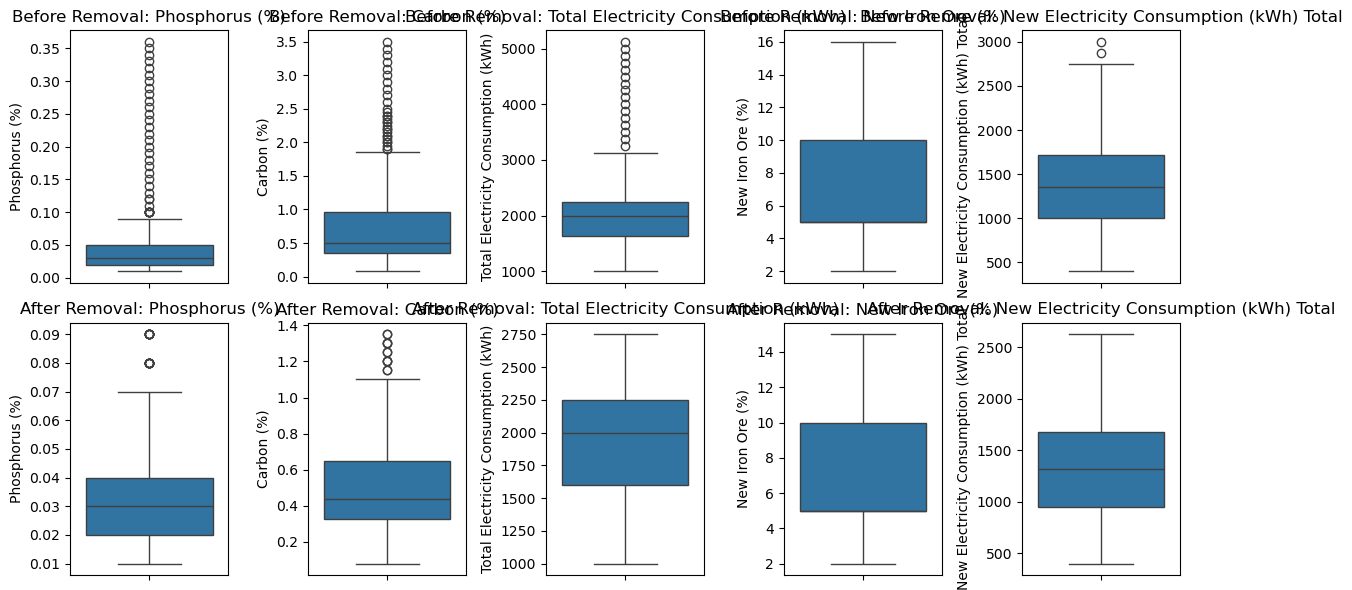

Original DataFrame size: 312
Cleaned DataFrame size: 253


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select numeric columns
numeric_columns = steel.select_dtypes(include=['int', 'float']).columns

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to remove outliers
def remove_outliers(df):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Identify outliers for each numeric column and print them
outlier_dict = {}
for column in numeric_columns:
    outliers = identify_outliers(steel, column)
    outlier_dict[column] = outliers
    print(f'Outliers in {column}:\n{outliers}\n')

# Remove outliers from the DataFrame
cleaned_steel = remove_outliers(steel)

# Visualize data before and after outlier removal using boxplots
plt.figure(figsize=(12, 6))

# Boxplots before outlier removal
for i, column in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1)
    sns.boxplot(y=steel[column])
    plt.title(f'Before Removal: {column}')

# Boxplots after outlier removal
for i, column in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1 + len(numeric_columns))
    sns.boxplot(y=cleaned_steel[column])
    plt.title(f'After Removal: {column}')

plt.tight_layout()
plt.show()

# Print the size of original and cleaned DataFrame
print(f'Original DataFrame size: {steel.shape[0]}')
print(f'Cleaned DataFrame size: {cleaned_steel.shape[0]}')


In [169]:
steel.shape

(312, 27)

In [171]:
# Save the 'steel' DataFrame to a CSV file
steel.to_csv('PROJECT_1_POWER BI.csv', index=False)

# Alternatively, if you're using the cleaned dataset:
# steel_cleaned.to_csv('steel_cleaned.csv', index=False)
